In [1]:
# pip install google-play-scraper

In [2]:
# from google_play_scraper import Sort, reviews, app
# import json
# from tqdm import tqdm

In [3]:
# app_packages = ['com.deepcovid19']

# app_reviews = []

# for ap in tqdm(app_packages):
#   for score in list(range(1, 6)):
#     for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
#       rvs, _ = reviews(
#         ap,
#         lang='id',
#         country='id',
#         sort=sort_order,
#         count= 200 if score == 3 else 100,
#         filter_score_with=score
#       )
#       for r in rvs:
#         r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
#         r['appId'] = ap
#       app_reviews.extend(rvs)

In [4]:
import pandas as pd
# app_reviews_df = pd.DataFrame(app_reviews)
# app_reviews_df.to_csv('dataaplikasicovid19.csv', index=None, header=True)
# app_reviews_df

In [5]:
dabru = pd.read_csv('dataaplikasicovid19.csv')

In [6]:
databaru = dabru.iloc[:,3]
databaru

0      Aplikasi hanya menampilkan peta persebaran cov...
1      Aplikasi sampah. Kementerian banyak buang uang...
2      Info persebaran di peta gak valid samasekali. ...
3      Ini apalah, aplikasi kayak gak berguna sama se...
4      Tolong diperbaiki kinerja aplikasinya, banyak ...
                             ...                        
665                              Bermanfaat. Informatif.
666                                               Siaaap
667                                                Bagus
668    Ada nya aplikasi ini semoga covit19 bisa hilan...
669    Sangat membantu untuk mengetahui perkembangan ...
Name: content, Length: 670, dtype: object

In [7]:
# databaru.to_csv("databaru.csv",index=None)

In [8]:
slangS=pd.read_csv("/content/slangS (2).csv",sep=";")
slangS

,slang,formal
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa
...,...,...
15001,gataunya,tidak taunya
15002,gtau,tidak tau
15003,gatau,tidak tau
15004,fans2,fan-fan


In [9]:
a = slangS.to_dict('records')

In [10]:
b = {}
for i in a:
  key1 = list(i.keys())[0]
  key2 = list(i.keys())[1]
  formal = i[key2]
  slang = i[key1]
  b[slang] = formal
print(b)

{'woww': 'wow', 'aminn': 'amin', 'met': 'selamat', 'netaas': 'menetas', 'keberpa': 'keberapa', 'eeeehhhh': 'eh', 'kata2nyaaa': 'kata-katanya', 'hallo': 'halo', 'kaka': 'kakak', 'ka': 'kak', 'daah': 'dah', 'aaaaahhhh': 'ah', 'yaa': 'ya', 'smga': 'semoga', 'slalu': 'selalu', 'amiin': 'amin', 'kk': 'kakak', 'trus': 'terus', 'sii': 'sih', 'nyenengin': 'menyenangkan', 'bgt': 'banget', 'gemess': 'gemas', 'akuuu': 'aku', 'jgn': 'jangan', 'udah': 'sudah', 'gitu': 'begitu', 'aja': 'saja', 'gemesiin': 'menggemaskan', 'menyenangkn': 'menyenangkan', 'rb': 'ribu', 'akau': 'aku', 'saranin': 'menyarankan', 'nemuin': 'menemukan', 'yah': 'ya', 'mnis2nya': 'manis-manisnya', 'gtu': 'begitu', 'tu': 'itu', 'idolaa': 'idola', 'bangett': 'banget', 'kaakk': 'kak', 'baaiikkk': 'baik', 'telaatt': 'telat', 'kaak': 'kak', 'yg': 'yang', 'lg': 'lagi', 'skarang': 'sekarang', 'sempet': 'sempat', 'karna': 'karena', 'ngga': 'tidak', 'mantep': 'mantap', 'loohhh': 'loh', 'yeee': 'ya', 'baguuuuus': 'bagus', 'sampe': 'samp

In [11]:
pip install sastrawi

In [12]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
#Preprocessing Data

def casefolding(text):
  #case folding
  text = text.lower() #membuat text menjadi lowercase
  return text

def filtering(text):
  #filtering 
  text = re.sub(r"\d+", "", text) #menghilangkan angka
  text = text.translate(str.maketrans("","",string.punctuation)) #menghapus tanda baca
  text = text.strip() #menghilangkan karakter kosong
  text = re.compile(r'\b( ' + '|'.join (b.keys())+r')\b').sub(lambda x: b[x.group()],text) #mengubah slang word menjadi formal
  return text 

def remove_emojis(text):
  emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
  return re.sub(emoj, '', text)

def stopword(text):
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  text = stopword.remove(text)
  return text

def stemming(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  text = stemmer.stem(text)
  return text

def teksbersih(text):
  case_folding1 = casefolding(text)
  filtering1 = filtering(case_folding1)
  emoji1 = remove_emojis(filtering1)
  stopword1 = stopword(emoji1)
  stemming1 = stemming(stopword1)
  return stemming1

In [14]:
# databaru = databaru.apply(lambda x:teksbersih(x))
# databaru.head()

In [15]:
# databaru.to_csv("datateksbersih.csv")

In [16]:
databaru = pd.read_csv("/content/datateksbersih.csv")

In [17]:
databaru = databaru.dropna()
databaru

,content
0,aplikasi tampil peta sebar covid tidak beri in...
1,aplikasi sampah menteri banyak buang uang apli...
2,info sebar peta valid samasekali cek beberapa ...
3,apa aplikasi kayak guna sama sekali jelas wakt...
4,baik kerja aplikasi banyak glitch error isi da...
...,...
640,manfaat informatif
641,siaaap
642,bagus
643,nya aplikasi moga covit hilang negara


In [18]:
content = pd.array(databaru['content'],dtype="string")
content

<StringArray>
[       'aplikasi tampil peta sebar covid tidak beri informasi tarik halaman informasi tampil link tidak ada aplikasi perintah apa kait biasa belanja pasar link judi saran harap beri informasi baik halaman informasi masyarakat mudah paham bahaya covid',
 'aplikasi sampah menteri banyak buang uang aplikasi akses coba baik aplikasi peduli lindung lengkap fiturnya jangan buat aplikasi hampir rupa padahal aplikasi bisa banyak fitur repot otak cuman buat aplikasi proyek simpul pribadi buang aplikasi titik',
                                                                                                 'info sebar peta valid samasekali cek beberapa camat saya tau persis banyak orang positif di aplikasi tidak aplikasi formalitas doang buang uang uninstall',
                                                                                                                                                     'apa aplikasi kayak guna sama sekali jelas waktu vaksin no telepon eh dafta

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams
from pandas import DataFrame

def term_matrix(pesan, vectorizer):
  term_matrix1 = vectorizer.fit_transform(pesan)
  return DataFrame(term_matrix1.toarray(),
                   columns=vectorizer.get_feature_names())

In [20]:
count_vect=CountVectorizer(ngram_range=(1,2))
bagofwords = term_matrix(content, count_vect)
bagofwords[0:3]

,aaah,aaah mah,abnormal,abnormal mohon,aceh,aceh per,aceng,ada,ada agama,ada aplikasi,ada atur,ada berapa,ada berita,ada bisa,ada covid,ada data,ada fitur,ada grafik,ada ikon,ada inti,ada kait,ada kode,ada koneksi,ada lonjak,ada luar,ada melarat,ada opsi,ada perintah,ada sama,ada searching,ada sekarang,ada sms,ada suspect,ada ubah,ada yang,adadimana,adadimana mana,adalah,adalah bukan,adalah masa,...,worldometer,worldometer terimakasih,wuhan,wuhan otg,wuhan sebar,wujud,wujud fokus,ya,ya tunggu,yang,yang baru,yang buat,yang butuh,yang hak,yang kali,yang kami,yang kemarin,yang kita,yang mumpuni,yang paling,yang sampai,yang sangat,yang sedang,yang sudah,yangsubhanalloh,yangsubhanalloh buang,yesus,yesus kati,ygtdk,ygtdk jujur,youtxjos,zoe,zoe is,zona,zona merah,zona sekitar,zonakabupaten,zonakabupaten ktrangan,zonasi,zonasi sesuai
0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
wordpositif = pd.read_csv("/content/positive.txt", header=None)
wordnegatif = pd.read_csv("/content/negative.txt", header=None)

In [22]:
wordpositif.columns = ['positif']
wordnegatif.columns = ['negatif']

In [23]:
negatifbaru = ['orang positif',
               'uninstall',
               'buang',
               'glitch',
               'error',
               'jenuh',
               'hilang',
               'covid',
               'odp',
               'pdp',
               'otg']

In [24]:
for newneg in negatifbaru:
  wordnegatif = wordnegatif.append({'negatif': newneg}, ignore_index=True,sort=True)

In [25]:
wordpositif1 = wordpositif.values.tolist()
wordnegatif1 = wordnegatif.values.tolist()

flatten_positif = []
flatten_negatif = []
  
for sublist in wordpositif1:
  for val in sublist:
    flatten_positif.append(val)

for sublist in wordnegatif1:
  for val in sublist:
    flatten_negatif.append(val)

In [26]:
word_negatif = []
for text in flatten_negatif:
  case_folding = casefolding(text)
  word_negatif.append(case_folding)

word_positif = []
for text in flatten_positif:
  case_folding = casefolding(text)
  word_positif.append(case_folding)

In [27]:
countpositif = 0
countnegatif = 0
i=0
j=0
scoresentimen = 0
totalpositif=0
totalnegatif=0
totalnetral=0
sentimen = []

for i in range(len(bagofwords)):
  data = {}
  for j in range(len(bagofwords.columns)):
    if bagofwords.at[i,bagofwords.columns[j]] != 0 and bagofwords.columns.values[j] in word_positif:
      countpositif+=1
      data["totalpositif"] = countpositif
    elif bagofwords.at[i,bagofwords.columns[j]] != 0 and bagofwords.columns.values[j] in word_negatif:
      countnegatif+=1
      data["totalnegatif"] = countnegatif
  palingbesar = 0
  if countpositif > countnegatif:
    palingbesar = countpositif
  else:
    palingbesar = countnegatif
  scoresentimen = countpositif - countnegatif
  if scoresentimen == 0:
    data["sentimen"] = "netral"
    totalnetral+=1
  else:
    scoresentimen = scoresentimen / palingbesar
    if scoresentimen >= 0.5:
      data["sentimen"] = "positif"
      totalpositif+=1
    elif scoresentimen <= -0.5:
      data["sentimen"] = "negatif"
      totalnegatif+=1
    else:
      data["sentimen"] = "netral"
      totalnetral+=1

  sentimen.append(data)

  countpositif=0
  countnegatif=0
 
dframe = pd.DataFrame(sentimen)

In [28]:
data = pd.concat([databaru,dframe],axis=1,join="inner")
data[:10]

,content,totalnegatif,totalpositif,sentimen
0,aplikasi tampil peta sebar covid tidak beri in...,5.0,2.0,negatif
1,aplikasi sampah menteri banyak buang uang apli...,4.0,2.0,negatif
2,info sebar peta valid samasekali cek beberapa ...,4.0,2.0,negatif
3,apa aplikasi kayak guna sama sekali jelas wakt...,1.0,2.0,positif
4,baik kerja aplikasi banyak glitch error isi da...,4.0,4.0,netral
5,entah lah banyak bug sana sini contoh update d...,2.0,2.0,netral
6,masuk no telp paswordmuncul form lengkaptrus m...,NaN,NaN,netral
7,aplikasi yangsubhanalloh buang duit negara mas...,2.0,1.0,negatif
8,fungsi apps apa isi profil bolakbalik terus ak...,1.0,NaN,negatif
9,ada kait sehat sebar spam virus iklan virus tr...,3.0,2.0,netral


In [29]:
data.to_csv('data1.csv')

In [30]:
countpos=0
countneg=0
countnet=0
for i in data["sentimen"]:
  if i == "positif":
    countpos+=1
  elif i == "negatif":
    countneg+=1
  else:
    countnet+=1
print(countpos,countneg,countnet)

202 188 255


In [31]:
countpos=0
countneg=0
countnet=0
c = []
j = 0

for i in range(len(data)):
  das = {}
  if data['sentimen'][i] == "positif":
    if countpos < 180:
      das["content"] = data["content"][j]
      das["sentimen"] = data["sentimen"][j]
      das["totalpositif"] = data["totalpositif"][j]
      das["totalnegatif"] = data["totalnegatif"][j]
      c.append(das)
      countpos+=1
    j+=1
  elif data['sentimen'][i] == "negatif":
    if countneg < 180:
      das["content"] = data["content"][j]
      das["sentimen"] = data["sentimen"][j]
      das["totalpositif"] = data["totalpositif"][j]
      das["totalnegatif"] = data["totalnegatif"][j]
      c.append(das)
      countneg+=1
    j+=1
  else:
    if countnet < 180:
      das["content"] = data["content"][j]
      das["sentimen"] = data["sentimen"][j]
      das["totalpositif"] = data["totalpositif"][j]
      das["totalnegatif"] = data["totalnegatif"][j]
      c.append(das)
      countnet+=1
    j+=1
c = pd.DataFrame(c)

In [32]:
X = c["content"]
y = c["sentimen"]

In [33]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
           X, y, test_size = 0.2, random_state = 0, stratify = y)

In [34]:
print(y_test.value_counts())
print(y_train.value_counts())

negatif    36
netral     36
positif    36
Name: sentimen, dtype: int64
negatif    144
positif    144
netral     144
Name: sentimen, dtype: int64


In [35]:
X_train = count_vect.fit_transform(X_train).toarray()
y_train = y_train.values

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
 
classifier = MultinomialNB();
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
y_pred1 = classifier.predict(X_train)

In [38]:
print(classification_report(y_train,y_pred1))

              precision    recall  f1-score   support

     negatif       0.99      0.97      0.98       144
      netral       0.96      0.95      0.96       144
     positif       0.97      0.99      0.98       144

    accuracy                           0.97       432
   macro avg       0.97      0.97      0.97       432
weighted avg       0.97      0.97      0.97       432



In [39]:
import pickle
f = open('my_classifier.pickle', 'wb')
pickle.dump(classifier, f)
pickle.dump(count_vect,f)
f.close()

In [40]:
import pickle
f = open('my_classifier.pickle', 'rb')
classifier = pickle.load(f)
count_vect = pickle.load(f)
f.close()

In [41]:
X_test = count_vect.transform(X_test).toarray()
y_test = y_test.values

In [42]:
y_pred = classifier.predict(X_test)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     negatif       0.75      0.83      0.79        36
      netral       0.88      0.78      0.82        36
     positif       0.86      0.86      0.86        36

    accuracy                           0.82       108
   macro avg       0.83      0.82      0.82       108
weighted avg       0.83      0.82      0.82       108



In [44]:
df = pd.DataFrame(list(zip(y_test, y_pred)),
               columns =['aktual', 'prediksi'])

In [45]:
totalpositifpred=0
totalnegatifpred=0
totalnetralpred=0

for i in range(len(df)):
  if df.prediksi.values[i] == 'positif':
    totalpositifpred+=1
  elif df.prediksi.values[i] == 'netral':
    totalnetralpred+=1
  else:
    totalnegatifpred+=1

print(totalpositifpred,totalnetralpred,totalnegatifpred)

36 32 40


In [46]:
nilaihasilprediksipositif = (totalpositifpred/len(df))*100
nilaihasilprediksinetral = (totalnetralpred/len(df))*100
nilaihasilprediksinegatif = (totalnegatifpred/len(df))*100
print(nilaihasilprediksipositif,'%')
print(nilaihasilprediksinetral,'%')
print(nilaihasilprediksinegatif,'%')

33.33333333333333 %
29.629629629629626 %
37.03703703703704 %


In [47]:
cm = confusion_matrix(y_test, y_pred)

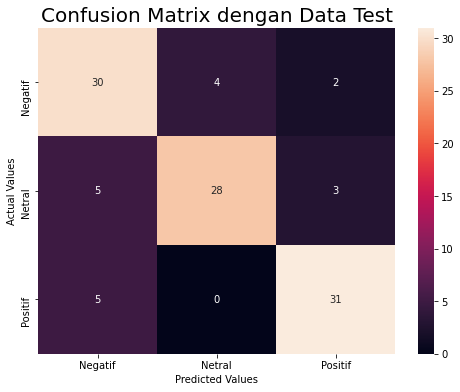

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))
sns.heatmap(cm,
            annot=True,
            xticklabels = ['Negatif','Netral','Positif'], 
            yticklabels = ['Negatif','Netral','Positif'])
plt.title('Confusion Matrix dengan Data Test',fontdict={'size':20})
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

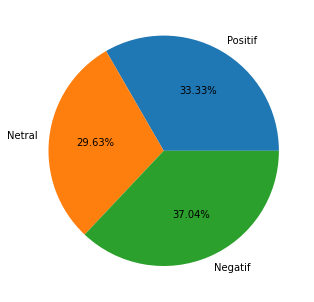

In [49]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
label = ['Positif','Netral','Negatif']
nilai = [nilaihasilprediksipositif,nilaihasilprediksinetral,nilaihasilprediksinegatif]
axes = plt.pie(nilai,labels=label,autopct='%1.2f%%')

In [50]:
dataframe = pd.read_csv('m.csv')
dataframe

,Unnamed: 0,content,sentimen
0,0,juang penuh tantang bahkan nyawa jadi taruh mo...,positif
1,1,kasih suka slogan cuma slogan nama slogan bukt...,positif
2,2,zoe is kmeanwhile and t v ere ffffeuwh et qte ...,netral
3,3,ayo kitawaspada copik,positif
4,4,oke,positif
5,5,bagus tahu yang paling rentan covid jadi lebih...,positif
6,6,ikut,netral
7,7,selamat juang hidup tetap jalan walaupun keaad...,positif
8,8,stayathome lawancovid,positif
9,9,mantap,positif


In [ ]:
dataframe1 = dataframe.iloc[:,1]

In [ ]:
dataframe1 = dataframe1.apply(lambda x:teksbersih(x))

In [53]:
uji = count_vect.transform(dataframe1).toarray()
uji

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [54]:
prediksi = classifier.predict(uji)

In [ ]:
dataframe['prediksisentimen'] = prediksi
dataframe

In [56]:
dataframe.to_csv('dataframesetelahuji.csv')

In [57]:
cmpred = confusion_matrix(dataframe['sentimen'], dataframe['prediksisentimen'])
cmpred

array([[ 3,  0,  0],
       [ 0,  7,  2],
       [ 2,  6, 35]])

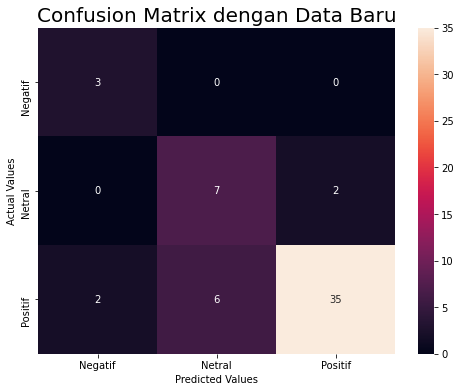

In [58]:
plt.figure(figsize=(8,6))
sns.heatmap(cmpred,
            annot=True,
            xticklabels = ['Negatif','Netral','Positif'], 
            yticklabels = ['Negatif','Netral','Positif'])
plt.title('Confusion Matrix dengan Data Baru',fontdict={'size':20})
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [59]:
print(classification_report(dataframe['sentimen'], dataframe['prediksisentimen']))

              precision    recall  f1-score   support

     negatif       0.60      1.00      0.75         3
      netral       0.54      0.78      0.64         9
     positif       0.95      0.81      0.88        43

    accuracy                           0.82        55
   macro avg       0.69      0.86      0.75        55
weighted avg       0.86      0.82      0.83        55



In [60]:
totalpositifpred=0
totalnegatifpred=0
totalnetralpred=0

for i in range(len(dataframe)):
  if dataframe.prediksisentimen.values[i] == 'positif':
    totalpositifpred+=1
  elif dataframe.prediksisentimen.values[i] == 'netral':
    totalnetralpred+=1
  else:
    totalnegatifpred+=1

print(totalpositifpred,totalnetralpred,totalnegatifpred)

37 13 5


In [61]:
nilaihasilprediksipositif = (totalpositifpred/len(dataframe))*100
nilaihasilprediksinetral = (totalnetralpred/len(dataframe))*100
nilaihasilprediksinegatif = (totalnegatifpred/len(dataframe))*100
print(nilaihasilprediksipositif,'%')
print(nilaihasilprediksinetral,'%')
print(nilaihasilprediksinegatif,'%')

67.27272727272727 %
23.636363636363637 %
9.090909090909092 %


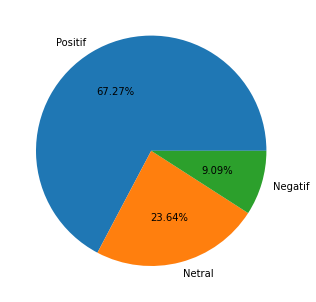

In [62]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
label = ['Positif','Netral','Negatif']
nilai = [nilaihasilprediksipositif,nilaihasilprediksinetral,nilaihasilprediksinegatif]
axes = plt.pie(nilai,labels=label,autopct='%1.2f%%')